In [1]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D
from keras.utils import plot_model

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
(X_train,Y_train),(X_test,Y_test)  = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [3]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
print(X_train.shape)
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
print(X_test.shape)
X_train = X_train/255
X_test  = X_test/255
X_train = X_train.astype('float')
X_test  = X_test.astype('float')
X_train[0].shape



(60000, 28, 28, 1)
(10000, 28, 28, 1)


(28, 28, 1)

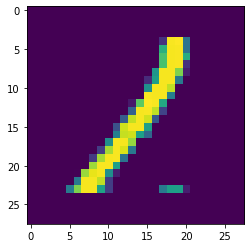

In [4]:
def show_img(img):
    img  = np.array(img,dtype='float')
    img = img.reshape((28,28))
    
    plt.imshow(img)
x = np.random.randint(0,X_test.shape[0])
show_img(X_train[x])

In [5]:
np.random.seed(0)
model = Sequential()
model.add(Conv2D(16,input_shape=(28,28,1),kernel_size=(3,3),activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
#model.add(MaxPooling2D())

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation='softmax'))

model.summary()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(X_train,Y_train,batch_size=32,epochs=5,validation_split=0.1,shuffle=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 98,442
Trainable params: 98,442
Non-trainable params: 0
____________________________________________________

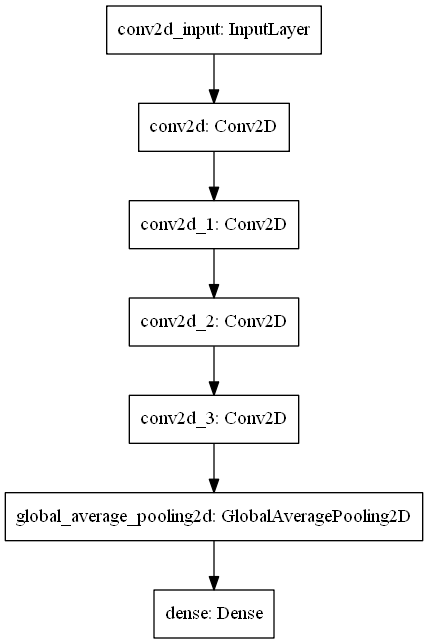

In [6]:
plot_model(model,to_file='model.png')

In [7]:
model.save('Activation.h5')


In [ ]:
model.evaluate(X_test, Y_test)
model.summary()

176/313 [===============>..............] - ETA: 6s - loss: 0.1809 - accuracy: 0.9467

In [ ]:
from keras.models import Model
import scipy as sp
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

In [ ]:
cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))

In [ ]:
cam_model.summary()

In [ ]:
features,results = cam_model.predict(X_test)
features.shape

In [ ]:
for idx in range(10):
    features_for_one_img = features[idx,:,:,:]
    #height_roomout = X_train.shape[1]/features_for_one_img.shape[0]
    #width_roomout  = X_train.shape[2]/features_for_one_img.shape[1]
    #print(height_roomout,width_roomout)
 
    #cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    #print(cam_features.shape)
    pred = np.argmax(results[idx])
    cam_features = features_for_one_img
    
    
    plt.figure(facecolor='white')
    cam_weights = gap_weights[:,pred]
    cam_output  = np.dot(cam_features,cam_weights)
    #print(features_for_one_img.shape)

    buf = 'Predicted Class = ' +str( pred )+ ', Probability = ' + str(results[idx][pred])

    plt.xlabel(buf)

    plt.imshow(np.squeeze(X_test[idx],-1), alpha=0.5)

    plt.imshow(cam_output, cmap='jet', alpha=0.5)

     

    plt.show()